# K-Means Algorithm

## About Dataset:
the data contains crime data of different States . Given the 4 categories of crime commited:
- Murder
- Assault
- Urban pop
- Rape

### Aim :
1. Perform cluster analysis with K means Algorithm using optimal using Elbow method.
2. Give your valuable comments on each cluster you produce using the mean value of each attribute of each cluster.
3. Also perform Hierarchical clustering with suitable dendogram.


## Loading Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
df = pd.read_csv("crime_data.csv")

In [3]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
State       50 non-null object
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


** no null values**

In [5]:
df.keys()

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


we see that there is much variablity in the "Assualt" category as compared to other crime category, but the mean and meadian are somewhat close . lets plot box plot to see other insights.

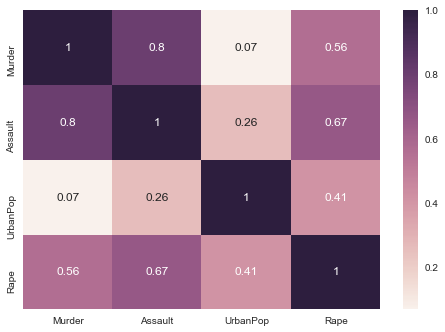

In [7]:
sns.heatmap(df.corr(), annot = True)

**correlation between murder and assualt may be because of the way they are attempted , that is before attempting murder the suspect would have assaulted the victim.<br>
but the results are different of both category ,and report is filed on the basis that how much fatal the attack was and whether the victim survived or not. **

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


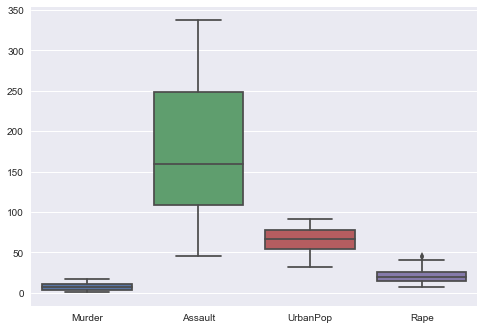

In [8]:
sns.boxplot(df)

**the above plot shows that we have laerge number of Assualt cases and this also states that each group is different from each other as none of their Median line is overlapping, Assualt cases are varying much in different states, but most of the assualt cases in can be assummed to be high because the length of the box high above 50 percentile  **

### Training the datset :

** Since K-Means is unsupervised Machine Learning Algortihm so it does not take any Label and no spiltting of data required**

In [9]:
train_data = df[['Murder','Assault','UrbanPop','Rape']]

In [10]:
train_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


# Standardizing the data

Here we see that the data is not scaled properly and have different range of values in each columns. But usually it is best practice to standardise the data before feeding it to any machine learning algorithm.

In [11]:
scl_data = StandardScaler()
scl_df = scl_data.fit_transform(train_data)

In [12]:
scl_df[0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [13]:
scl_df.std()

1.0

In [14]:
scl_df.shape

(50, 4)

# Let now work with clusters

In [15]:
cluster = range(1,9)    #Initially we do not know the number of clusters required for our data set so we 
error = []              # we are taking a range of values from 1 to 9 
# error is an empty array for storing the error in distance 

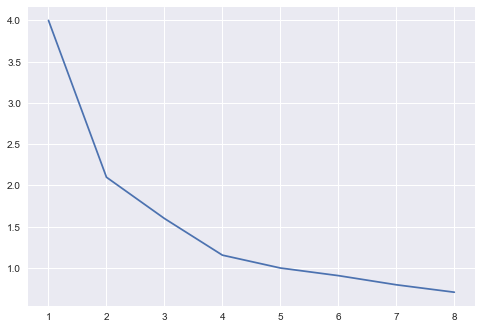

In [16]:
for k in cluster:
    kmean = KMeans(n_clusters=k)
    kmean.fit(scl_df)
    #predict = kmean.predict(scl_df)
    error.append(kmean.inertia_/scl_df.shape[0])         # calculating with Euclidean distance
df_cluster = pd.DataFrame({"cluster_number":cluster,"SSE": error})   
df_cluster
#error
plt.plot(df_cluster.cluster_number,df_cluster.SSE)

In [17]:
df_cluster # as described by the above plot and below sse values table we can say that the distance 
#between the cluster member and centroid decreases abruptly at 2 points that is cluster_number 2 and cluster_number 4.
#but at cluster 4 the difference is not decreasing at large rate so we will choose 4 .

,SSE,cluster_number
0,4.000000,1
1,2.099233,2
2,1.599110,3
3,1.154771,4
4,0.998919,5
5,0.906622,6
6,0.795552,7
7,0.705634,8


### Model Building with no. of cluster = 4

In [20]:
model = KMeans(n_clusters=4)
model.fit(scl_df)
pred = model.predict(scl_df)

In [21]:
pred

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3, 2,
       1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0, 2, 0,
       0, 2, 2, 0])

**cluster__centers_ : array, [n_clusters, n_features] -- Coordinates of cluster centers(centroids)** <br>

interpretation: the cluster center gives the coordinates of the centroids since here the coordinates are more than 2d so we need some 3d other plot to plot these points.

In [23]:
c = model.cluster_centers_
c

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import warnings
warnings.filterwarnings(action = "ignore")

In [53]:
markers = {'0' :'o',
           '1' :'o',
           '2' :'o',
           '3' :'o',    
}


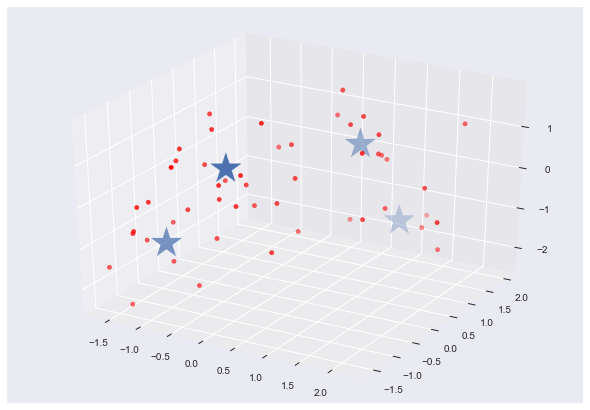

In [66]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(c[:,0],c[:,1],c[:,2],c[:3],marker = "*",s = 1000)
ax.scatter(scl_df[:,0],scl_df[:,1],scl_df[:,2],scl_df[:,3],c = 'red')
plt.show()

In [69]:
count = model.labels_
count = list(count)
print(count.count(0))
print(count.count(1))
print(count.count(2))
print(count.count(3))

16
8
13
13


**above values shows that how many values are there in each cluster**

In [70]:
df["cluster"] = count

In [71]:
df.head()

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [72]:
# now we will inverse tranform the centroids values to see some insights from clusters of each variables

In [75]:
cluster_inverse = scl_data.inverse_transform(c)
cluster_centroid = pd.DataFrame(data = cluster_inverse,columns=train_data.columns)

In [76]:
cluster_centroid

,Murder,Assault,UrbanPop,Rape
0,5.656250,138.875000,73.875000,18.781250
1,13.937500,243.625000,53.750000,21.412500
2,3.600000,78.538462,52.076923,12.176923
3,10.815385,257.384615,76.000000,33.192308


##### Intrpretation:
1. we see that centroid of all variable in different clusters
2. Talking about the extreme case(high values) that is "cluster 4" :
   - States having value nearby 76 in Urbanpop variable will fall in this cluster so on we can say for other feature values
   - here we can say that as the urbanpop increases the assault and murder rates are prone to happen
   - so places belonging to cluster 4 here should be put under high security monitoring.

In [85]:
df[df['cluster']== 3]["State"] ## these are the stae which need security monitoring

1         Alaska
2        Arizona
4     California
5       Colorado
8        Florida
12      Illinois
19      Maryland
21      Michigan
24      Missouri
27        Nevada
30    New Mexico
31      New York
42         Texas
Name: State, dtype: object

## HIERARCHICHAL CLUSTERING -- DENDOGRAM

In [135]:
import scipy.cluster.hierarchy as shc

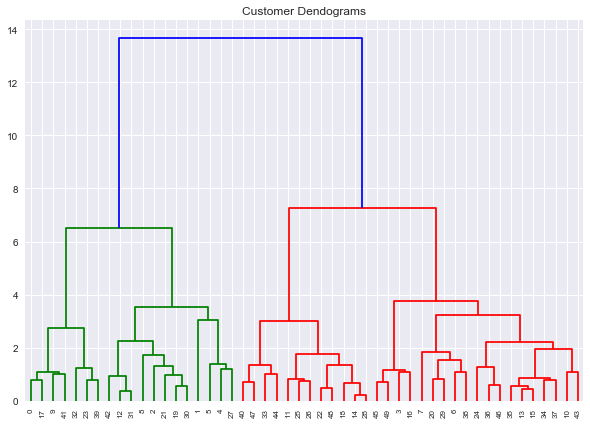

In [137]:
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(scl_df, method='ward')) 

In [77]:
from sklearn.cluster import AgglomerativeClustering

In [78]:
print(AgglomerativeClustering().get_params)

<bound method BaseEstimator.get_params of AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=2,
            pooling_func=<function mean at 0x0000026D69CBD8C8>)>


In [79]:
agg = AgglomerativeClustering(affinity='euclidean',n_clusters=2) #as we can see from dendogram we will consider the longest
# vertical line and which tells that ther can be 2 cluster that can form.

In [80]:
agg.fit(scl_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=2,
            pooling_func=<function mean at 0x0000026D69CBD8C8>)

In [81]:
pred_agg = agg.fit_predict(scl_df)

In [82]:
pred_agg

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [83]:
pred

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3, 2,
       1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0, 2, 0,
       0, 2, 2, 0])